In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
from matplotlib.image import imread

%matplotlib inline

In [2]:
import tensorflow as tf
print(f'Tensorflow version is {tf.__version__}')
physical_devices = tf.config.list_physical_devices('GPU')
print("Num GPUs:", len(physical_devices))

Tensorflow version is 2.3.1
Num GPUs: 0


In [3]:
data_dir = '/home/drishtant/FINAL_TF2_FILES/TF_2_Notebooks_and_Data/04-CNNs/cell_images/'

In [4]:
os.listdir(data_dir)

['test', 'train']

In [5]:
train_path = data_dir + "train/"
test_path  = data_dir + "test/"

In [6]:
train_path

'/home/drishtant/FINAL_TF2_FILES/TF_2_Notebooks_and_Data/04-CNNs/cell_images/train/'

In [7]:
test_path

'/home/drishtant/FINAL_TF2_FILES/TF_2_Notebooks_and_Data/04-CNNs/cell_images/test/'

In [8]:
os.listdir(train_path)

['parasitized', 'uninfected']

In [9]:
os.listdir(test_path)

['parasitized', 'uninfected']

In [10]:
para_cell = train_path+"parasitized/"+ os.listdir(train_path+"parasitized/")[0]
uninfected_cell = train_path+"uninfected/"+ os.listdir(train_path+"uninfected/")[0]

In [11]:
para_cell

'/home/drishtant/FINAL_TF2_FILES/TF_2_Notebooks_and_Data/04-CNNs/cell_images/train/parasitized/C137P98ThinF_IMG_20151005_163335_cell_3.png'

In [12]:
uninfected_cell

'/home/drishtant/FINAL_TF2_FILES/TF_2_Notebooks_and_Data/04-CNNs/cell_images/train/uninfected/C221ThinF_IMG_20151106_160022_cell_15.png'

In [13]:
uninfected_cell = imread(uninfected_cell)
para_cell       = imread(para_cell)

In [14]:
uninfected_cell

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]], dtype=float32)

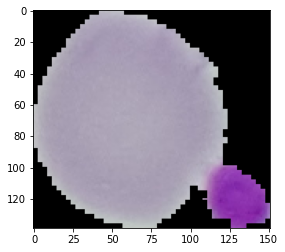

In [15]:
plt.imshow(uninfected_cell)

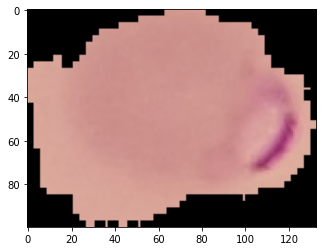

In [16]:
plt.imshow(para_cell)

In [17]:
para_cells = [train_path+"parasitized/"+ os.listdir(train_path+"parasitized/")[i] for i in range(1000)]
uninfected_cells = [train_path+"uninfected/"+ os.listdir(train_path+"uninfected/")[i] for i in range(1000)]

In [18]:
para_cells = [imread(i) for i in para_cells]
uninfected_cells = [imread(i) for i in uninfected_cells]

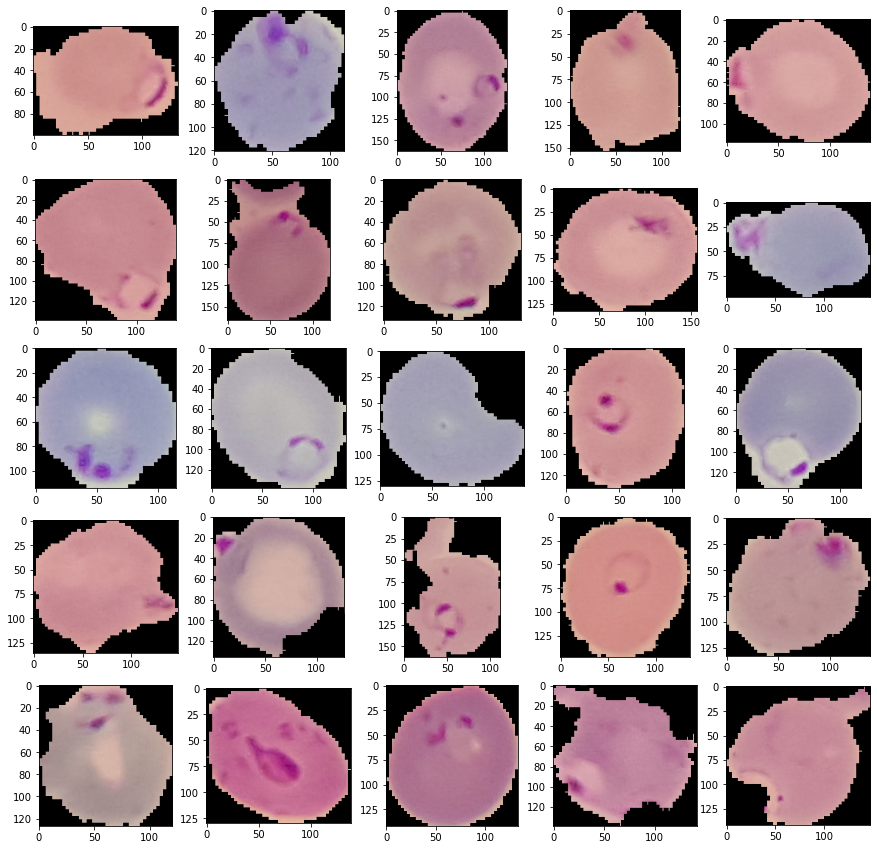

In [19]:
plt.figure(figsize=(15,15))

for i in range(25):
    plt.subplot(5,5,i+1)
    plt.imshow(para_cells[i])

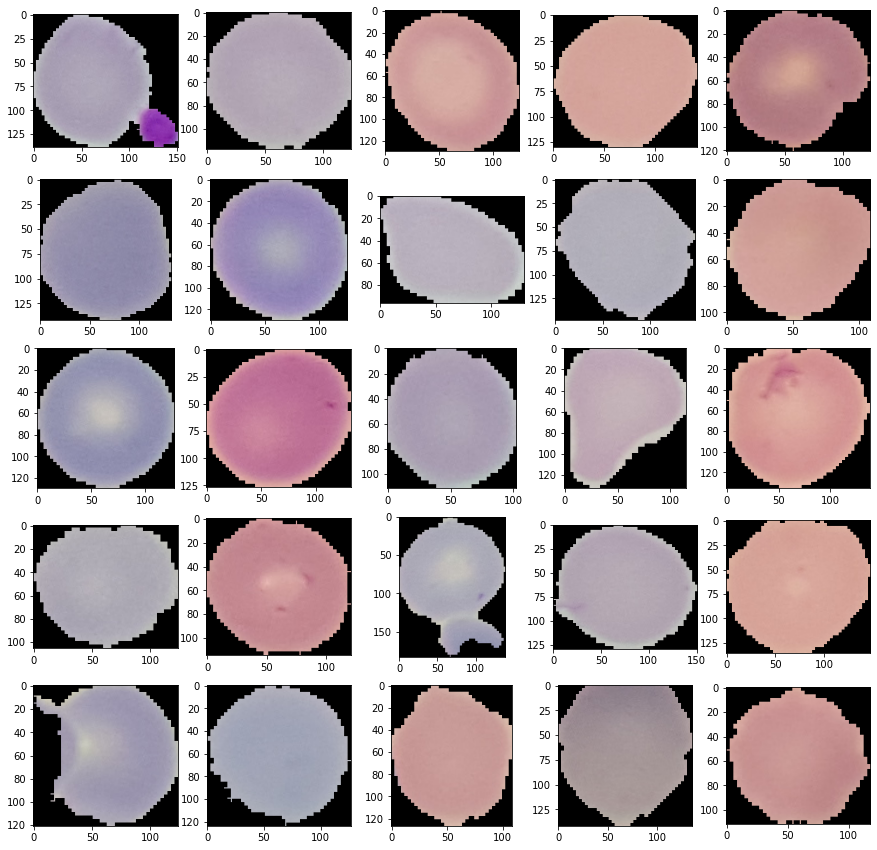

In [20]:
plt.figure(figsize=(15,15))

for i in range(25):
    plt.subplot(5,5,i+1)
    plt.imshow(uninfected_cells[i])

In [21]:
para_cells[0].shape

(100, 133, 3)

In [22]:
para_cells[0].shape[0]

100

In [23]:
dim1 = []
dim2 = []
dim3 = []
for i in para_cells:
    dim1.append(i.shape[0])
    dim2.append(i.shape[1])
    dim3.append(i.shape[2])

In [24]:
print(len(dim1))
print(len(dim2))

1000
1000


In [25]:
dim_df = pd.DataFrame({'dim1':dim1, 'dim2':dim2, 'dim3':dim3})

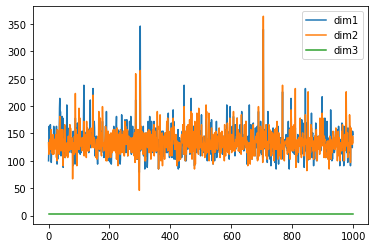

In [26]:
dim_df.plot()

In [27]:
np.mean(dim1)
np.mean(dim2)

134.392

In [28]:
image_shape = (130,130,3)

In [29]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [30]:
help(ImageDataGenerator)

Help on class ImageDataGenerator in module tensorflow.python.keras.preprocessing.image:

class ImageDataGenerator(keras_preprocessing.image.image_data_generator.ImageDataGenerator)
 |  ImageDataGenerator(featurewise_center=False, samplewise_center=False, featurewise_std_normalization=False, samplewise_std_normalization=False, zca_whitening=False, zca_epsilon=1e-06, rotation_range=0, width_shift_range=0.0, height_shift_range=0.0, brightness_range=None, shear_range=0.0, zoom_range=0.0, channel_shift_range=0.0, fill_mode='nearest', cval=0.0, horizontal_flip=False, vertical_flip=False, rescale=None, preprocessing_function=None, data_format=None, validation_split=0.0, dtype=None)
 |  
 |  Generate batches of tensor image data with real-time data augmentation.
 |  
 |   The data will be looped over (in batches).
 |  
 |  Arguments:
 |      featurewise_center: Boolean.
 |          Set input mean to 0 over the dataset, feature-wise.
 |      samplewise_center: Boolean. Set each sample mean to 0

In [31]:
image_gen = ImageDataGenerator(rotation_range = 20,
                               height_shift_range = 0.1,
                               width_shift_range = 0.1,
                               #rescale = 1/255,
                               horizontal_flip = True,
                               vertical_flip = True,
                               fill_mode="nearest",
                               shear_range=0.1,
                               zoom_range=0.1
                              )

In [32]:
image_gen

In [33]:
uninfected_cell.max()

0.8235294

In [34]:
para_cell.max()

0.89411765

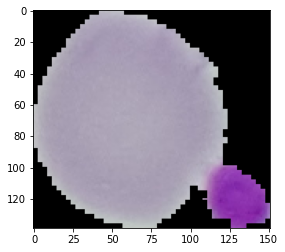

In [35]:
plt.imshow(uninfected_cell)

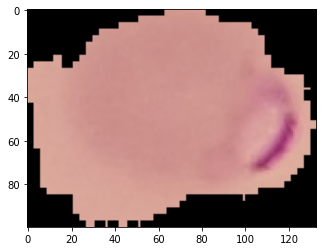

In [36]:
plt.imshow(para_cell)

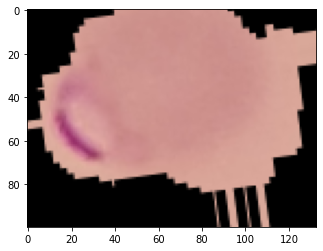

In [37]:
plt.imshow(image_gen.random_transform(para_cell))

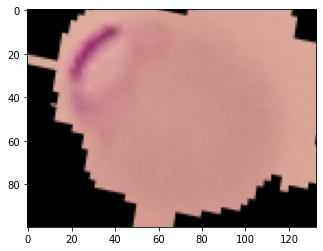

In [38]:
plt.imshow(image_gen.random_transform(para_cell))

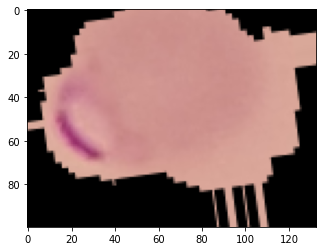

In [39]:
plt.imshow(image_gen.random_transform(para_cell))

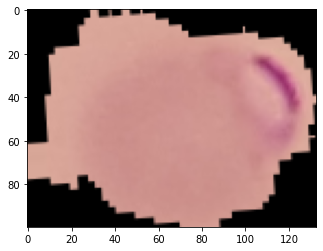

In [40]:
plt.imshow(image_gen.random_transform(para_cell))

In [41]:
train_path

'/home/drishtant/FINAL_TF2_FILES/TF_2_Notebooks_and_Data/04-CNNs/cell_images/train/'

In [42]:
test_path

'/home/drishtant/FINAL_TF2_FILES/TF_2_Notebooks_and_Data/04-CNNs/cell_images/test/'

In [43]:
image_gen.flow_from_directory(train_path)
image_gen.flow_from_directory(test_path)

Found 24958 images belonging to 2 classes.
Found 2600 images belonging to 2 classes.


In [44]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Activation, Dropout
from tensorflow.keras.callbacks import EarlyStopping
optimiser = tf.keras.optimizers.Adam(learning_rate=0.001)

In [45]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3),input_shape=image_shape, activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=image_shape, activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=image_shape, activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Flatten())


model.add(Dense(128))
model.add(Activation('relu'))

# Dropouts help reduce overfitting by randomly turning neurons off during training.
# Here we say randomly turn off 50% of neurons.
model.add(Dropout(0.5))

# Last layer, remember its binary so we use sigmoid
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [46]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 128, 128, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 62, 62, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 31, 31, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 29, 29, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 12544)             0

In [47]:
early_stop = EarlyStopping(monitor="val_loss",patience=2)

In [48]:
train_image_gen = image_gen.flow_from_directory(train_path,
                                               target_size=image_shape[:2],
                                               color_mode='rgb',
                                               batch_size=16,
                                               class_mode='binary')

test_image_gen = image_gen.flow_from_directory(test_path,
                                               target_size=image_shape[:2],
                                               color_mode='rgb',
                                               batch_size=16,
                                               class_mode='binary',
                                              shuffle=False)

Found 24958 images belonging to 2 classes.
Found 2600 images belonging to 2 classes.


In [49]:
test_image_gen.class_indices

{'parasitized': 0, 'uninfected': 1}

In [50]:
train_image_gen.class_indices

{'parasitized': 0, 'uninfected': 1}

In [51]:
num_samples = len(train_image_gen)
num_samples

1560

In [52]:
len(train_image_gen)

1560

In [53]:
import warnings
warnings.filterwarnings('ignore')

In [54]:
model.fit_generator(train_image_gen, validation_data=test_image_gen,
                    epochs=20, 
                    callbacks=[early_stop])

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/20
1560/1560 [==============================] - 188s 121ms/step - loss: 0.8172 - accuracy: 0.5515 - val_loss: 0.6907 - val_accuracy: 0.5450
Epoch 2/20
1560/1560 [==============================] - 182s 117ms/step - loss: 0.6823 - accuracy: 0.5698 - val_loss: 0.6769 - val_accuracy: 0.5685
Epoch 3/20
1560/1560 [==============================] - 182s 117ms/step - loss: 0.6789 - accuracy: 0.5793 - val_loss: 0.6765 - val_accuracy: 0.5865
Epoch 4/20
1560/1560 [==============================] - 182s 117ms/step - loss: 0.6771 - accuracy: 0.5842 - val_loss: 0.6808 - val_accuracy: 0.5635
Epoch 5/20
1560/1560 [==============================] - 183s 117ms/step - loss: 0.6709 - accuracy: 0.5940 - val_loss: 0.6767 - val_accuracy: 0.5873


In [78]:
losses = pd.DataFrame(model.history.history)

In [79]:
import cufflinks as cf
cf.go_offline()

In [80]:
losses.iplot()

In [81]:
model.metrics_names

['loss', 'accuracy']

In [82]:
pred = model.predict_generator(test_image_gen)

Instructions for updating:
Please use Model.predict, which supports generators.


In [83]:
pred

array([[1.1886060e-03],
       [6.7979854e-05],
       [4.0426850e-04],
       ...,
       [9.8979986e-01],
       [9.8700571e-01],
       [9.3071514e-01]], dtype=float32)

In [84]:
predictions = pred >= 0.5

In [85]:
predictions

array([[False],
       [False],
       [False],
       ...,
       [ True],
       [ True],
       [ True]])

In [86]:
from sklearn.metrics import classification_report , confusion_matrix

In [87]:
test_image_gen.classes

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

In [88]:
print(classification_report(test_image_gen.classes, predictions))

              precision    recall  f1-score   support

           0       0.97      0.91      0.94      1300
           1       0.92      0.97      0.94      1300

    accuracy                           0.94      2600
   macro avg       0.94      0.94      0.94      2600
weighted avg       0.94      0.94      0.94      2600



In [89]:
confusion_matrix(test_image_gen.classes, predictions)

array([[1189,  111],
       [  41, 1259]])

In [90]:
import seaborn as sns

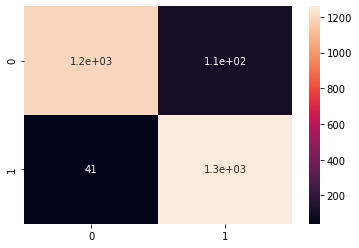

In [92]:
sns.heatmap(confusion_matrix(test_image_gen.classes, predictions), annot=True)

In [93]:
train_image_gen.class_indices

{'parasitized': 0, 'uninfected': 1}

In [94]:
test_image_gen.class_indices

{'parasitized': 0, 'uninfected': 1}

In [95]:
model.save("drishtant_custom_image.h5")

In [97]:
losses.to_csv('drishtant_custom_image_model_history.csv')

# Done!